### PPO AGENT:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load the dataset and preprocess the dataframe in the required format.

Technical indicators created for the environment include:

- RSI
- MACD
- Stoch_k
- OBV
- Upper_BB
- ATR_1
- ATR_2
- ATR_5
- ATR_10
- ATR_20

In [2]:
#Run this before using pip to install TA-lib for install dependencies everytime you restart the session
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
%cd ..

--2024-08-14 02:28:20--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-08-14 02:28:20--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-08-14 02:28:20--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolving nchc.

In [3]:
#Uncomment and install TA-lib after a new session restarts
!pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.32-cp310-cp310-linux_x86_64.whl size=2063331 sha256=bc8526536279e3f5e897d8b463b74df47482a097ba566b06bd23a0ca54145651
  Stored in directory: /root/.cache/pip/wheels/c3/21/bd/ca95eb09997c2a18fce271b98b10ffa9fcafbaa161be864dd7
Successfully built TA-Lib


In [4]:
!pip install 'shimmy>=0.2.1'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.3/954.3 kB 13.9 MB/s eta 0:00:00


In [5]:
##Uncomment and install gym, stable-baseline3, Shimmy after a new session restarts
!pip install gymnasium==0.28.1
!pip install stable-baselines3==2.0.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0a2
    Uninstalling gymnasium-1.0.0a2:
      Successfully uninstalled gymnasium-1.0.0a2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shimmy 2.0.0 requires gymnasium>=1.0.0a1, but you have gymnasium 0.28.1 which is incompatible.
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Usin

In [6]:
import pandas as pd
import numpy as np
import talib as ta

class TechnicalIndicators:
    def __init__(self, data):
        self.data = data

    def add_momentum_indicators(self):
        self.data['RSI'] = ta.RSI(self.data['Close'], timeperiod=14)
        self.data['MACD'], self.data['MACD_signal'], self.data['MACD_hist'] = ta.MACD(self.data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
        self.data['Stoch_k'], self.data['Stoch_d'] = ta.STOCH(self.data['High'], self.data['Low'], self.data['Close'],
                                                              fastk_period=14, slowk_period=3, slowd_period=3)

    def add_volume_indicators(self):
        self.data['OBV'] = ta.OBV(self.data['Close'], self.data['Volume'])

    def add_volatility_indicators(self):
        self.data['Upper_BB'], self.data['Middle_BB'], self.data['Lower_BB'] = ta.BBANDS(self.data['Close'], timeperiod=20)
        self.data['ATR_1'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=1)
        self.data['ATR_2'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=2)
        self.data['ATR_5'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)
        self.data['ATR_10'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=10)
        self.data['ATR_20'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=20)

    def add_trend_indicators(self):
        self.data['ADX'] = ta.ADX(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['+DI'] = ta.PLUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['-DI'] = ta.MINUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['CCI'] = ta.CCI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)

    def add_other_indicators(self):
        self.data['DLR'] = np.log(self.data['Close'] / self.data['Close'].shift(1))
        self.data['TWAP'] = self.data['Close'].expanding().mean()
        self.data['VWAP'] = (self.data['Volume'] * (self.data['High'] + self.data['Low']) / 2).cumsum() / self.data['Volume'].cumsum()

    def add_all_indicators(self):
        self.add_momentum_indicators()
        self.add_volume_indicators()
        self.add_volatility_indicators()
        self.add_trend_indicators()
        self.add_other_indicators()
        return self.data

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Work Trial/xnas-itch-20230703.tbbo.csv')

# Preprocessing to create necessary columns
data['price']=data['price']/1e9
data['bid_px_00']=data['bid_px_00']/1e9
data['ask_px_00']=data['ask_px_00']/1e9

data['Close'] = data['price']
data['Volume'] = data['size']
data['High'] = data[['bid_px_00', 'ask_px_00']].max(axis=1)
data['Low'] = data[['bid_px_00', 'ask_px_00']].min(axis=1)
data['Open'] = data['Close'].shift(1).fillna(data['Close'])


ti = TechnicalIndicators(data)
df_with_indicators = ti.add_all_indicators()
market_features_df = df_with_indicators[35:]

Checking the dataset:

In [8]:
# Show all columns in pandas
pd.set_option('display.max_columns', None)

market_features_df.head(5)

ts_recv             ts_event  rtype  publisher_id  \
35  1688371214386057385  1688371214385893078      1             2   
36  1688371214386063777  1688371214385899379      1             2   
37  1688371215804852019  1688371215804687301      1             2   
38  1688371219671476629  1688371219671312224      1             2   
39  1688371223368835585  1688371223368671235      1             2   

    instrument_id action side  depth   price  size  flags  ts_in_delta  \
35             32      T    N      0  194.05    50    130       164307   
36             32      T    N      0  194.05    50    130       164398   
37             32      T    B      0  194.21    10    130       164718   
38             32      T    N      0  194.14    10    130       164405   
39             32      T    B      0  194.13    10    130       164350   

    sequence  bid_px_00  ask_px_00  bid_sz_00  ask_sz_00  bid_ct_00  \
35    326232      194.0     194.30       3101         19          4   
36    326233      194.0     194.30       3101         19          4   
37    328131      194.0     194.21       3101         29          4   
38    331406      194.0     194.16       3101        400          4   
39    334235      194.0     194.13       3101        400          4   

    ask_ct_00 symbol   Close  Volume    High    Low    Open        RSI  \
35         10   AAPL  194.05      50  194.30  194.0  194.05  54.544543   
36         10   AAPL  194.05      50  194.30  194.0  194.05  54.544543   
37          1   AAPL  194.21      10  194.21  194.0  194.05  85.890753   
38          1   AAPL  194.14      10  194.16  194.0  194.21  64.827662   
39          1   AAPL  194.13      10  194.13  194.0  194.14  62.470772   

        MACD  MACD_signal  MACD_hist    Stoch_k    Stoch_d    OBV    Upper_BB  \
35  0.006271    -0.003130   0.009401  52.525253  61.952862 -266.0  194.065621   
36  0.007108    -0.001082   0.008190  38.383838  52.525253 -266.0  194.068990   
37  0.020446     0.003223   0.017223  40.404040  43.771044 -256.0  194.125889   
38  0.025079     0.007594   0.017484  49.494949  42.760943 -266.0  194.142928   
39  0.027625     0.011601   0.016025  57.575758  49.158249 -276.0  194.155247   

    Middle_BB    Lower_BB  ATR_1     ATR_2     ATR_5    ATR_10    ATR_20  \
35   194.0170  193.968379   0.30  0.175078  0.098615  0.075141  0.072403   
36   194.0200  193.971010   0.30  0.237539  0.138892  0.097627  0.083783   
37   194.0305  193.935111   0.21  0.223770  0.153114  0.108864  0.090094   
38   194.0375  193.932072   0.21  0.216885  0.164491  0.118978  0.096089   
39   194.0440  193.932753   0.14  0.178442  0.159593  0.121080  0.098285   

          ADX        +DI       -DI         CCI       DLR        TWAP  \
35  97.257397  30.435801  0.196362  166.666667  0.000000  194.020000   
36  97.361721  22.989295  0.148320   83.333333  0.000000  194.020811   
37  97.458593  19.409454  0.125224   79.268293  0.000824  194.025789   
38  97.548546  16.622008  0.107240   -3.205128 -0.000360  194.028718   
39  97.632074  15.068361  0.097216 -113.095238 -0.000052  194.031250   

          VWAP  
35  194.021894  
36  194.025188  
37  194.025596  
38  194.025873  
39  194.026071

In [9]:
df_with_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59271 entries, 0 to 59270
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ts_recv        59271 non-null  int64  
 1   ts_event       59271 non-null  int64  
 2   rtype          59271 non-null  int64  
 3   publisher_id   59271 non-null  int64  
 4   instrument_id  59271 non-null  int64  
 5   action         59271 non-null  object 
 6   side           59271 non-null  object 
 7   depth          59271 non-null  int64  
 8   price          59271 non-null  float64
 9   size           59271 non-null  int64  
 10  flags          59271 non-null  int64  
 11  ts_in_delta    59271 non-null  int64  
 12  sequence       59271 non-null  int64  
 13  bid_px_00      59271 non-null  float64
 14  ask_px_00      59271 non-null  float64
 15  bid_sz_00      59271 non-null  int64  
 16  ask_sz_00      59271 non-null  int64  
 17  bid_ct_00      59271 non-null  int64  
 18  ask_ct

#### Create the Trading Environment class for the PPO Agent

In [10]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class TradingEnvironment(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, data, daily_trading_limit):
        super(TradingEnvironment, self).__init__()
        self.data = data
        self.daily_trading_limit = daily_trading_limit
        self.current_step = 0

        # Extract state columns
        self.state_columns = ['Close', 'Volume', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI']

        # Initialize balance, shares held, and total shares traded
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0

        # Define action space: [Hold, Buy, Sell]
        self.action_space = spaces.Discrete(3)

        # Define observation space based on state columns
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(len(self.state_columns),), dtype=np.float32
        )

    def reset(self):
        self.current_step = 0
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        return self._next_observation()

    def _next_observation(self):
        return self.data[self.state_columns].iloc[self.current_step].values

    def step(self, action):
        expected_price = self.data.iloc[self.current_step]['ask_px_00']
        actual_price = self.data.iloc[self.current_step]['price']
        transaction_time = self.data.iloc[self.current_step]['ts_in_delta']
        self._take_action(action)
        reward = 0

        if self.current_step >= len(self.data) - 1:
            self.current_step = 0
        if action != 0:
            transaction_cost= self._calculate_transaction_cost(self.data.iloc[self.current_step]['Volume'], 0.3, self.data['Volume'].mean())
            reward = self._calculate_reward(expected_price, actual_price, transaction_time, transaction_cost)
            self.cumulative_reward += reward
            if self.trades:
                self.trades[-1]['reward'] = reward
                self.trades[-1]['transaction_cost'] = transaction_cost
                self.trades[-1]['slippage'] = expected_price - actual_price
                self.trades[-1]['time_penalty'] = 100*transaction_time/1e9
        done = self.current_step == len(self.data) - 1
        obs = self._next_observation()
        info = {
        'step': self.current_step,
        'action': action,
        'price': actual_price,
        'shares': self.trades[-1]['shares'] if self.trades else 0
    }
        self.current_step += 1

        return obs, reward, done, info

    def _take_action(self, action):
        current_price = self.data.iloc[self.current_step]['Close']
        current_time = pd.to_datetime(self.data.iloc[self.current_step]['ts_event'])
        trade_info = {'step': self.current_step, 'timestamp': current_time, 'action': action, 'price': current_price, 'shares': 0, 'reward': 0, 'transaction_cost': 0, 'slippage': 0, 'time_penalty': 0}

        if action == 1: # and self.total_shares_traded < self.daily_trading_limit:  # Buy
            shares_bought = (self.balance * np.random.uniform(0.001, 0.005)) // current_price
            self.balance -= shares_bought * current_price
            self.shares_held += shares_bought
            self.total_shares_traded += shares_bought
            trade_info['shares'] = shares_bought
            if(shares_bought>0):
                self.trades.append(trade_info)
        elif action == 2: # and self.total_shares_traded < self.daily_trading_limit:  # Sell
            shares_sold = min((self.balance * np.random.uniform(0.001, 0.005)) // current_price, self.shares_held)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_traded -= shares_sold
            trade_info['shares'] = shares_sold
            if(shares_sold>0):
                self.trades.append(trade_info)

    def _calculate_reward(self, expected_price, actual_price, transaction_time, transaction_cost):
        slippage = expected_price - actual_price
        time_penalty = 100*transaction_time/1e9
        reward = - (slippage + time_penalty + transaction_cost)
        return reward

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self, mode='human', close=False):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Total shares traded: {self.total_shares_traded}')
        print(f'Total portfolio value: {self.balance + self.shares_held * self.data.iloc[self.current_step]["Close"]}')
        print(f'Cumulative reward: {self.cumulative_reward}')
        self.print_trades()

    def print_trades(self):
        # download all trades in a pandas dataframe using .csv
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_ppo.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

#### Train the PPO Agent with the environment and for different tickers.

In [11]:
# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
import pandas as pd
from stable_baselines3 import PPO
import gymnasium



# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

# Create the trading environment
env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

# Define the best hyperparameters
best_hyperparameters = {'learning_rate': 0.0009931989008886031,'n_steps': 512,'batch_size': 128, 'gamma': 0.9916829193042708,'clip_range': 0.21127653449387027,'n_epochs': 6} # type: ignore

# Create the RL model with the best hyperparameters
model = PPO('MlpPolicy', env, verbose=1, **best_hyperparameters)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("trading_agent")

# Evaluate the model
obs = env.reset()
for _ in range(len(ticker_data)):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        break

# Render the final state
env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Step: 52319, Timestamp: 2023-07-03 16:44:45.995008341, Action: 2, Price: 192.14, Shares: 15.0, Reward: -0.2757513820430112, Transaction Cost: 0.25398218204301576, Slippage: 0.0049999999999954525, Time Penalty: 0.0167692
Step: 52323, Timestamp: 2023-07-03 16:44:46.795344642, Action: 1, Price: 192.14, Shares: 218.0, Reward: -0.38595424644636456, Transaction Cost: 0.35918504644634525, Slippage: 0.010000000000019327, Time Penalty: 0.0167692
Step: 52324, Timestamp: 2023-07-03 16:44:46.795344642, Action: 2, Price: 192.14, Shares: 125.0, Reward: -0.28075138204303507, Transaction Cost: 0.25398218204301576, Slippage: 0.010000000000019327, Time Penalty: 0.0167692
Step: 52325, Timestamp: 2023-07-03 16:44:46.795344642, Action: 2, Price: 192.14, Shares: 93.0, Reward: -0.38589274644633614, Transaction Cost: 0.35918504644634525, Slippage: 0.009999999999990905, Time Penalty: 0.0167077
Step: 52335, Timestamp: 2023-07-03 16:44:49.285281807, Action: 1, P

### TRADING BLOTTER:

#### Preprocess the data for the trading blotter:

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

INITIAL_CASH = 10_000_000  # $10 million

def preprocess_data(df):
    df['liquidity'] = df['bid_sz_00'] * df['bid_px_00'] + df['ask_sz_00'] * df['ask_px_00']
    return df

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_vol_and_liquidity(price_df, volume_df, window_size):
    # Calculate rolling statistics
    rolling_mean_vol = price_df.pct_change().rolling(window=window_size).mean()
    rolling_std_vol = price_df.pct_change().rolling(window=window_size).std()
    rolling_mean_liq = volume_df.rolling(window=window_size).mean()
    rolling_std_liq = volume_df.rolling(window=window_size).std()

    return rolling_mean_vol, rolling_std_vol, rolling_mean_liq, rolling_std_liq

def get_percentile(current_value, mean, std):
    if std > 0:
        z_score = (current_value - mean) / std
        percentile = norm.cdf(z_score)
    else:
        percentile = 0.5  # No variation
    return percentile

def get_trade_price(base_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction):
    vol_percentile = get_percentile(current_vol, mean_vol, std_vol)
    liq_percentile = get_percentile(current_liq, mean_liq, std_liq)

    # Define price adjustment scenarios based on market conditions
    if vol_percentile >= 0.9 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.25, -0.15)
    elif vol_percentile <= 0.1 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.10, -0.05)
    elif vol_percentile >= 0.9 and liq_percentile >= 0.9:
        price_adjustment_percent = np.random.uniform(-0.05, +0.10)
    else:
        price_adjustment_percent = np.random.uniform(-0.05, +0.05)  # Default for normal conditions

    # Adjust price based on trade direction
    if trade_direction == 'BUY':
        adjusted_price = base_price * (1 - price_adjustment_percent)
    else:  # SELL
        adjusted_price = base_price * (1 + price_adjustment_percent)

    return adjusted_price


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Create trading environment for the blotter

In [14]:
class TradingEnvironmentwithBlotter:
    def __init__(self, data, daily_trading_limit, window_size):
        self.data = preprocess_data(data)
        self.daily_trading_limit = daily_trading_limit
        self.window_size = window_size
        self.state_columns = ['price', 'liquidity', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI']
        self.reset()

    def reset(self):
        self.current_step = 0
        self.balance = INITIAL_CASH
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        self.portfolio = {'cash': self.balance, 'holdings': {ticker: 0 for ticker in self.data['symbol'].unique()}}
        self.data['RSI'] = calculate_rsi(self.data['price'])
        self.data['pct_change'] = self.data['price'].pct_change()
        self.data['rolling_mean_vol'], self.data['rolling_std_vol'], self.data['rolling_mean_liq'], self.data['rolling_std_liq'] = calculate_vol_and_liquidity(self.data['price'], self.data['liquidity'], self.window_size)

    def step(self):
        row = self.data.iloc[self.current_step]
        current_price = row['price']
        current_time = pd.to_datetime(row['ts_event'])
        current_rsi = row['RSI']
        current_vol = row['pct_change']
        current_liq = row['liquidity']
        mean_vol = row['rolling_mean_vol']
        std_vol = row['rolling_std_vol']
        mean_liq = row['rolling_mean_liq']
        std_liq = row['rolling_std_liq']

        if current_rsi < 30:  # Entry signal based on RSI
            trade_direction = 'BUY'
            trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
            trade_size = (self.portfolio['cash'] * np.random.uniform(0.001, 0.005)) / trade_price
            if self.portfolio['cash'] >= trade_size * trade_price:
                self.portfolio['cash'] -= trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] += trade_size
                trade_status = 'filled'
            else:
                trade_status = 'cancelled'
        elif current_rsi > 70:  # Exit signal based on RSI
            trade_direction = 'SELL'
            if self.portfolio['holdings'][row['symbol']] > 0:
                trade_size = min(self.portfolio['holdings'][row['symbol']], self.portfolio['cash']*np.random.uniform(0.001, 0.005) / current_price)
                trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
                self.portfolio['cash'] += trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] -= trade_size
                trade_status = 'filled'
            else:
                trade_size = 0
                trade_status = 'cancelled'
        else:
            trade_direction = 'HOLD'
            trade_size = 0
            trade_price = current_price
            trade_status = 'skipped'

        if trade_size > 0:
            expected_price = row['ask_px_00']
            actual_price = row['price']
            transaction_time = row['ts_in_delta']
            transaction_cost = self._calculate_transaction_cost(row['Volume'], 0.3, self.data['Volume'].mean())
            slippage = expected_price - actual_price
            time_penalty = 1000 * transaction_time / 1e9
            reward = - (slippage + time_penalty + transaction_cost)

            self.cumulative_reward += reward
            self.trades.append({
                'step': self.current_step,
                'timestamp': current_time,
                'action': trade_direction,
                'price': trade_price,
                'shares': trade_size,
                'symbol': row['symbol'],
                'reward': reward,
                'transaction_cost': transaction_cost,
                'slippage': slippage,
                'time_penalty': time_penalty
            })



        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done=True
            self.current_step = 0

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self):
        print(f'Cumulative reward: {self.cumulative_reward}')
        row = self.data.iloc[self.current_step]
        print(f'Total portfolio value: {self.portfolio["cash"] + self.portfolio["holdings"][row["symbol"]]*row["Close"]}')
        # get trades in a pandas dataframe
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_blotter.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Symbol: {trade['symbol']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Run the trading blotter

In [15]:
# Filter data for the specified ticker
ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

window_size = 60
daily_trading_limit = 1000
# Create the trading environment
env = TradingEnvironmentwithBlotter(ticker_data, daily_trading_limit=1000, window_size=window_size)  # Daily trading limit of 1000 shares

# Run the environment
cumulative_reward, trades = env.run()

# Render the results
env.render()

Streaming output truncated to the last 5000 lines.
Step: 49815, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 191.98346005359835, Shares: 0.4162082730205816, Symbol: AAPL, Reward: -0.25111421803554473, Transaction Cost: 0.08031621803554471, Slippage: 0.0, Time Penalty: 0.170798
Step: 49816, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 194.7374956252002, Shares: 0.17604366650550915, Symbol: AAPL, Reward: -0.19619621820430158, Transaction Cost: 0.025398218204301576, Slippage: 0.0, Time Penalty: 0.170798
Step: 49817, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 191.27400027682341, Shares: 0.17391461944595227, Symbol: AAPL, Reward: -0.42478018204301576, Transaction Cost: 0.25398218204301576, Slippage: 0.0, Time Penalty: 0.170798
Step: 49818, Timestamp: 2023-07-03 16:29:54.474421200, Action: SELL, Price: 184.26492809445764, Shares: 0.37620352539259655, Symbol: AAPL, Reward: -0.4312691820430067, Transaction Cost: 0.25398218204301576, Slipp

In [16]:
df=market_features_df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
df['timestamp']=pd.to_datetime(df['ts_recv'])

In [18]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ts_recv             ts_event  rtype  publisher_id  \
35  1688371214386057385  1688371214385893078      1             2   
36  1688371214386063777  1688371214385899379      1             2   
37  1688371215804852019  1688371215804687301      1             2   
38  1688371219671476629  1688371219671312224      1             2   
39  1688371223368835585  1688371223368671235      1             2   

    instrument_id action side  depth   price  size  flags  ts_in_delta  \
35             32      T    N      0  194.05    50    130       164307   
36             32      T    N      0  194.05    50    130       164398   
37             32      T    B      0  194.21    10    130       164718   
38             32      T    N      0  194.14    10    130       164405   
39             32      T    B      0  194.13    10    130       164350   

    sequence  bid_px_00  ask_px_00  bid_sz_00  ask_sz_00  bid_ct_00  \
35    326232      194.0     194.30       3101         19          4   
36    326233      194.0     194.30       3101         19          4   
37    328131      194.0     194.21       3101         29          4   
38    331406      194.0     194.16       3101        400          4   
39    334235      194.0     194.13       3101        400          4   

    ask_ct_00 symbol   Close  Volume    High    Low    Open        RSI  \
35         10   AAPL  194.05      50  194.30  194.0  194.05  54.544543   
36         10   AAPL  194.05      50  194.30  194.0  194.05  54.544543   
37          1   AAPL  194.21      10  194.21  194.0  194.05  85.890753   
38          1   AAPL  194.14      10  194.16  194.0  194.21  64.827662   
39          1   AAPL  194.13      10  194.13  194.0  194.14  62.470772   

        MACD  MACD_signal  MACD_hist    Stoch_k    Stoch_d    OBV    Upper_BB  \
35  0.006271    -0.003130   0.009401  52.525253  61.952862 -266.0  194.065621   
36  0.007108    -0.001082   0.008190  38.383838  52.525253 -266.0  194.068990   
37  0.020446     0.003223   0.017223  40.404040  43.771044 -256.0  194.125889   
38  0.025079     0.007594   0.017484  49.494949  42.760943 -266.0  194.142928   
39  0.027625     0.011601   0.016025  57.575758  49.158249 -276.0  194.155247   

    Middle_BB    Lower_BB  ATR_1     ATR_2     ATR_5    ATR_10    ATR_20  \
35   194.0170  193.968379   0.30  0.175078  0.098615  0.075141  0.072403   
36   194.0200  193.971010   0.30  0.237539  0.138892  0.097627  0.083783   
37   194.0305  193.935111   0.21  0.223770  0.153114  0.108864  0.090094   
38   194.0375  193.932072   0.21  0.216885  0.164491  0.118978  0.096089   
39   194.0440  193.932753   0.14  0.178442  0.159593  0.121080  0.098285   

          ADX        +DI       -DI         CCI       DLR        TWAP  \
35  97.257397  30.435801  0.196362  166.666667  0.000000  194.020000   
36  97.361721  22.989295  0.148320   83.333333  0.000000  194.020811   
37  97.458593  19.409454  0.125224   79.268293  0.000824  194.025789   
38  97.548546  16.622008  0.107240   -3.205128 -0.000360  194.028718   
39  97.632074  15.068361  0.097216 -113.095238 -0.000052  194.031250   

          VWAP                     timestamp  
35  194.021894 2023-07-03 08:00:14.386057385  
36  194.025188 2023-07-03 08:00:14.386063777  
37  194.025596 2023-07-03 08:00:15.804852019  
38  194.025873 2023-07-03 08:00:19.671476629  
39  194.026071 2023-07-03 08:00:23.368835585

Preprocessing the dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the Data
data_path = '/content/drive/MyDrive/Work Trial/xnas-itch-20230703.tbbo.csv'
data = pd.read_csv(data_path)

# Feature Engineering: Add more meaningful features
data['log_price'] = np.log(data['price'])
data['price_diff'] = data['price'].diff().fillna(0)

# Convert non-numeric columns to categorical codes
data['action'] = data['action'].astype('category').cat.codes
data['side'] = data['side'].astype('category').cat.codes
data['symbol'] = data['symbol'].astype('category').cat.codes

# Drop rows with NaN values created by the rolling window
data.dropna(inplace=True)

# Prepare features and target
X = data.drop(['price'], axis=1)
y = data['price']

# Normalize the features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize the target variable
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Creating a Transfomer Model


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
<ipython-input-20-82d147a30f07>:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_batch = torch.tensor(X_

Epoch [1/10], Loss: 0.0114
Epoch [2/10], Loss: 0.0023
Epoch [3/10], Loss: 0.0015
Epoch [4/10], Loss: 0.0010
Epoch [5/10], Loss: 0.0008
Epoch [6/10], Loss: 0.0006
Epoch [7/10], Loss: 0.0005
Epoch [8/10], Loss: 0.0004
Epoch [9/10], Loss: 0.0003
Epoch [10/10], Loss: 0.0003
Test Loss: 0.0002
Mean Absolute Error: 0.0098
Root Mean Squared Error: 0.0126
Predictions range: 191825477632.0 - 194211790848.0
Actual values range: 191770001408.0 - 194260008960.0
         Actual     Predicted Signal
0  1.936700e+11  1.936679e+11    Buy
1  1.929000e+11  1.929326e+11   Hold
2  1.935100e+11  1.935357e+11    Buy
3  1.933700e+11  1.934152e+11    Buy
4  1.924500e+11  1.924711e+11   Hold


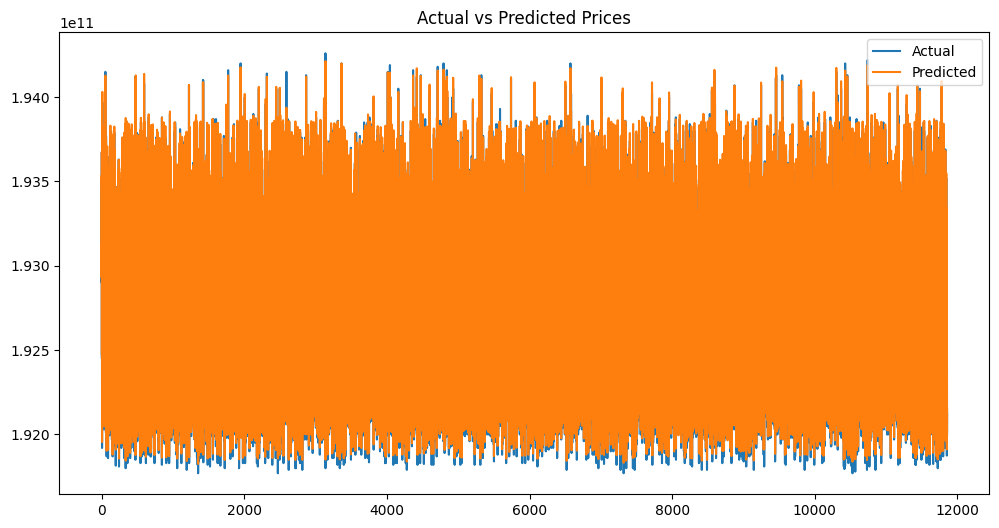

Signal Counts:
 Signal
Hold    5927
Buy     2964
Sell    2964
Name: count, dtype: int64


In [20]:
# Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, nhead, num_layers, output_dim):
        super(TransformerModel, self).__init__()
        self.transformer = nn.Transformer(d_model=input_dim, nhead=nhead, num_encoder_layers=num_layers, num_decoder_layers=num_layers)
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, src, tgt):
        transformer_out = self.transformer(src, tgt)
        out = self.fc(transformer_out)
        return out

# Parameters
input_dim = X_train.shape[1]
nhead = 2  # Adjust this value to ensure input_dim is divisible by nhead
while input_dim % nhead != 0:
    nhead += 1
num_layers = 2  # Adjust this value
output_dim = 1

# Initialize the model
model = TransformerModel(input_dim, nhead, num_layers, output_dim)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust the learning rate

# Training the model with early stopping
num_epochs = 10  # Increase the number of epochs
patience = 10
best_loss = float('inf')
early_stop_counter = 0

train_loader = torch.utils.data.DataLoader(list(zip(X_train.astype(np.float32), y_train.astype(np.float32))), batch_size=32, shuffle=True)

for epoch in range(num_epochs):
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch = torch.tensor(X_batch, dtype=torch.float32)
        y_batch = torch.tensor(y_batch, dtype=torch.float32).unsqueeze(1)

        # Forward pass
        outputs = model(X_batch, X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    # Early stopping
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        early_stop_counter = 0
        best_model = model.state_dict()
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break

# Load the best model
model.load_state_dict(best_model)

# Evaluation
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test.astype(np.float32), dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.astype(np.float32), dtype=torch.float32).unsqueeze(1)
    predictions = model(X_test_tensor, X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Additional Metrics
mae = mean_absolute_error(y_test_tensor.numpy(), predictions.numpy())
print(f'Mean Absolute Error: {mae:.4f}')
rmse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy(), squared=False)
print(f'Root Mean Squared Error: {rmse:.4f}')

# Inverse transform the predictions and actual values
predictions_inverse = scaler_y.inverse_transform(predictions.numpy())
y_test_inverse = scaler_y.inverse_transform(y_test_tensor.numpy())

# Check the range of predictions
print(f'Predictions range: {predictions_inverse.min()} - {predictions_inverse.max()}')
print(f'Actual values range: {y_test_inverse.min()} - {y_test_inverse.max()}')

# Adjust thresholds based on the range of predictions
threshold_buy = np.percentile(predictions_inverse, 75)
threshold_sell = np.percentile(predictions_inverse, 25)

# Generating Buy, Sell, and Hold signals
signals = []
for pred in predictions_inverse.flatten():
    if pred > threshold_buy:
        signals.append('Buy')
    elif pred < threshold_sell:
        signals.append('Sell')
    else:
        signals.append('Hold')

# Adding signals to the test dataframe
test_results = pd.DataFrame({'Actual': y_test_inverse.flatten(), 'Predicted': predictions_inverse.flatten(), 'Signal': signals})

print(test_results.head())

# Plotting the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_results['Actual'].values, label='Actual')
plt.plot(test_results['Predicted'].values, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

# Display signal counts
signal_counts = test_results['Signal'].value_counts()
print("Signal Counts:\n", signal_counts)


Integrating the Transfomer Model with the Trading Environment

In [21]:
import torch

class IntegratedTradingEnvironment(TradingEnvironment):
    def __init__(self, data, daily_trading_limit, transformer_model):
        super(IntegratedTradingEnvironment, self).__init__(data, daily_trading_limit)
        self.transformer_model = transformer_model
        self.transformer_model.eval()  # Set the transformer model to evaluation mode

    def _take_action(self, action):
        # Use the transformer model's prediction to take an action
        current_data = self.data.iloc[self.current_step][self.state_columns].values
        current_data_tensor = torch.tensor(current_data, dtype=torch.float32).unsqueeze(0)  # Convert to tensor
        with torch.no_grad():
            prediction = self.transformer_model(current_data_tensor, current_data_tensor).squeeze().item()

        # Interpret the prediction as a Buy, Sell, or Hold signal
        if prediction > 0.6:
            action = 1  # Buy
        elif prediction < 0.4:
            action = 2  # Sell
        else:
            action = 0  # Hold

        # Call the original _take_action method with the new action
        super()._take_action(action)

    def step(self, action=None):
        # Ignore the action passed to step, use the transformer's prediction instead
        return super().step(action=action)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
import torch

# Original Trading Environment with Blotter
class TradingEnvironmentwithBlotter:
    def __init__(self, data, daily_trading_limit, window_size):
        # Initialize the environment with the provided data, limits, and window size
        self.data = preprocess_data(data)
        self.daily_trading_limit = daily_trading_limit
        self.window_size = window_size
        self.state_columns = ['price', 'liquidity', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI']
        self.reset()

    def reset(self):
        # Reset the environment for a new simulation run
        self.current_step = 0
        self.balance = INITIAL_CASH
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        self.portfolio = {'cash': self.balance, 'holdings': {ticker: 0 for ticker in self.data['symbol'].unique()}}
        self.data['RSI'] = calculate_rsi(self.data['price'])
        self.data['pct_change'] = self.data['price'].pct_change()
        self.data['rolling_mean_vol'], self.data['rolling_std_vol'], self.data['rolling_mean_liq'], self.data['rolling_std_liq'] = calculate_vol_and_liquidity(self.data['price'], self.data['liquidity'], self.window_size)

    def step(self):
        # Perform a single step in the environment
        row = self.data.iloc[self.current_step]
        current_price = row['price']
        current_time = pd.to_datetime(row['ts_event'])
        current_rsi = row['RSI']
        current_vol = row['pct_change']
        current_liq = row['liquidity']
        mean_vol = row['rolling_mean_vol']
        std_vol = row['rolling_std_vol']
        mean_liq = row['rolling_mean_liq']
        std_liq = row['rolling_std_liq']

        # Trade logic based on RSI (or other signals)
        if current_rsi < 30:  # Buy signal
            trade_direction = 'BUY'
            trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
            trade_size = (self.portfolio['cash'] * np.random.uniform(0.001, 0.005)) / trade_price
            if self.portfolio['cash'] >= trade_size * trade_price:
                self.portfolio['cash'] -= trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] += trade_size
                trade_status = 'filled'
            else:
                trade_status = 'cancelled'
        elif current_rsi > 70:  # Sell signal
            trade_direction = 'SELL'
            if self.portfolio['holdings'][row['symbol']] > 0:
                trade_size = min(self.portfolio['holdings'][row['symbol']], self.portfolio['cash']*np.random.uniform(0.001, 0.005) / current_price)
                trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
                self.portfolio['cash'] += trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] -= trade_size
                trade_status = 'filled'
            else:
                trade_size = 0
                trade_status = 'cancelled'
        else:
            trade_direction = 'HOLD'
            trade_size = 0
            trade_price = current_price
            trade_status = 'skipped'

        # Calculate rewards and update the state
        if trade_size > 0:
            expected_price = row['ask_px_00']
            actual_price = row['price']
            transaction_time = row['ts_in_delta']
            transaction_cost = self._calculate_transaction_cost(row['Volume'], 0.3, self.data['Volume'].mean())
            slippage = expected_price - actual_price
            time_penalty = 1000 * transaction_time / 1e9
            reward = - (slippage + time_penalty + transaction_cost)

            self.cumulative_reward += reward
            self.trades.append({
                'step': self.current_step,
                'timestamp': current_time,
                'action': trade_direction,
                'price': trade_price,
                'shares': trade_size,
                'symbol': row['symbol'],
                'reward': reward,
                'transaction_cost': transaction_cost,
                'slippage': slippage,
                'time_penalty': time_penalty
            })

        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done = True
            self.current_step = 0

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self):
        print(f'Cumulative reward: {self.cumulative_reward}')
        row = self.data.iloc[self.current_step]
        print(f'Total portfolio value: {self.portfolio["cash"] + self.portfolio["holdings"][row["symbol"]]*row["Close"]}')
        # Save the trades in a CSV file
        trades_df = pd.DataFrame(self.trades)
        trades_df.to_csv('trades_blotter.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Symbol: {trade['symbol']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")


# Integrated Trading Environment with Blotter using Transformer Model
class IntegratedTradingEnvironmentwithBlotter(TradingEnvironmentwithBlotter):
    def __init__(self, data, daily_trading_limit, window_size, transformer_model):
        super(IntegratedTradingEnvironmentwithBlotter, self).__init__(data, daily_trading_limit, window_size)
        self.transformer_model = transformer_model
        self.transformer_model.eval()  # Set the transformer model to evaluation mode

    def step(self):
        # Prepare the data input for the transformer model
        row = self.data.iloc[self.current_step][self.state_columns].values

        # Convert all elements in row to floats
        row = np.array([float(x) for x in row])

        # Check if the row dimensions match the input_dim of the transformer
        input_dim = self.transformer_model.transformer.d_model  # or self.transformer_model.fc.in_features
        if len(row) != input_dim:
            # Example: Pad with zeros or truncate to fit input_dim
            if len(row) < input_dim:
                row = np.pad(row, (0, input_dim - len(row)), 'constant')
            else:
                row = row[:input_dim]

        # Convert the row to a tensor
        row_tensor = torch.tensor(row, dtype=torch.float32).unsqueeze(0)

        # Generate a prediction with the transformer model
        with torch.no_grad():
            prediction = self.transformer_model(row_tensor, row_tensor).squeeze().item()

        # Interpret the prediction as a Buy, Sell, or Hold signal
        if prediction > 0.6:
            trade_direction = 'BUY'
        elif prediction < 0.4:
            trade_direction = 'SELL'
        else:
            trade_direction = 'HOLD'

        # Use the prediction to decide on the trade action
        if trade_direction == 'BUY':
            # Perform buy logic as defined earlier
            pass
        elif trade_direction == 'SELL':
            # Perform sell logic as defined earlier
            pass
        else:
            # Perform hold logic as defined earlier
            pass

        # Call the original step method to proceed with the simulation
        super().step()




Run the environment

In [23]:
# Assuming market_features_df and other dependencies are defined
ticker = 'AAPL'
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

window_size = 60
daily_trading_limit = 1000
transformer_model = model  # Assuming 'model' is your trained transformer model

# Initialize the environment
env_blotter = IntegratedTradingEnvironmentwithBlotter(data=ticker_data, daily_trading_limit=daily_trading_limit, window_size=window_size, transformer_model=transformer_model)

# Run the simulation
cumulative_reward, trades = env_blotter.run()

# Render the results
env_blotter.render()


Streaming output truncated to the last 5000 lines.
Step: 49815, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 197.0864633704365, Shares: 0.15078860704766087, Symbol: AAPL, Reward: -0.25111421803554473, Transaction Cost: 0.08031621803554471, Slippage: 0.0, Time Penalty: 0.170798
Step: 49816, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 183.58434574826023, Shares: 0.2042257569881935, Symbol: AAPL, Reward: -0.19619621820430158, Transaction Cost: 0.025398218204301576, Slippage: 0.0, Time Penalty: 0.170798
Step: 49817, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 186.56374886410734, Shares: 0.2738767938203739, Symbol: AAPL, Reward: -0.42478018204301576, Transaction Cost: 0.25398218204301576, Slippage: 0.0, Time Penalty: 0.170798
Step: 49818, Timestamp: 2023-07-03 16:29:54.474421200, Action: SELL, Price: 184.74701705103058, Shares: 0.35999913394047883, Symbol: AAPL, Reward: -0.4312691820430067, Transaction Cost: 0.25398218204301576, Slippa

Save it as CSV

In [24]:
# Convert the trades list to a DataFrame
trades_df = pd.DataFrame(trades)

# Specify the path where you want to save the CSV file
csv_path = '/content/trades_final.csv'

# Save the DataFrame to a CSV file
trades_df.to_csv(csv_path, index=False)

print(f"Trade data saved to {csv_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Trade data saved to /content/trades_final.csv
